# Deep Q Network Tutorial

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 1. Environment Preparation
### 1.1 Mount drive and set project path.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

import sys
project_root = '/content/drive/MyDrive/課本與筆記/ML/final_project/First try'
sys.path.append(project_root)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### 1.2 Download Atari ROM.

In [3]:
!pip install gym
!pip install gym[atari]
!pip install atari-py
!pip install ale-py
!pip install "gymnasium[atari,accept-rom-license]"
!pip install "autorom[accept-rom-license]"
!pip install imageio imageio[ffmpeg]

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 24.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.6/540.6 kB 14.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for atari-py: filename=atari_py-0.2.9-cp310-cp310-linux_x86_64.whl size=2871816 sha256=9fc212f89ff85a90f39b61843e79308e9bdfa562cf9badb92647ec06f06c28b0
  Stored in directory: /root/.cache/pip/wheels/75/6f/04/1f3bf5255580101e16ff487564354dddcdd23ec3b43b775b7a
Successfully built atari-py
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 33.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 958.1/958.1 kB 61.3 MB/s eta 0:00:00
  Attempting uninstall: ale-py
    Found existing installation: ale-py 0.7.5
    Uninstalling ale-py-0.7.5:
      Successfully uninstalled ale-py-0.7.5
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 434.7/434.7 kB 11.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing met

In [4]:
! wget http://www.atarimania.com/roms/Roms.rar
! mkdir /content/ROM/
! unrar e -o+ /content/Roms.rar /content/ROM/

--2024-11-16 13:06:45--  http://www.atarimania.com/roms/Roms.rar
Resolving www.atarimania.com (www.atarimania.com)... 212.83.163.6
Connecting to www.atarimania.com (www.atarimania.com)|212.83.163.6|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://www.atarimania.com/roms/Roms.rar [following]
--2024-11-16 13:06:45--  https://www.atarimania.com/roms/Roms.rar
Connecting to www.atarimania.com (www.atarimania.com)|212.83.163.6|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 19612325 (19M) [application/octet-stream]
Saving to: ‘Roms.rar’

Roms.rar            100%[===================>]  18.70M  7.99MB/s    in 2.3s    

2024-11-16 13:06:48 (7.99 MB/s) - ‘Roms.rar’ saved [19612325/19612325]


UNRAR 6.11 beta 1 freeware      Copyright (c) 1993-2022 Alexander Roshal


Extracting from /content/Roms.rar

Extracting  /content/ROM/128 in 1 Game Select ROM (Unknown) ~.bin          0%  OK 
Extracting  /content/ROM/2 in 1

In [5]:
! python -m atari_py.import_roms /content/ROM/

copying battle_zone.bin from /content/ROM/Battlezone (1983) (Atari - GCC, Michael Feinstein, Patricia Goodson, Brad Rice) (CX2681) ~.bin to /usr/local/lib/python3.10/dist-packages/atari_py/atari_roms/battle_zone.bin
copying boxing.bin from /content/ROM/Boxing.bin to /usr/local/lib/python3.10/dist-packages/atari_py/atari_roms/boxing.bin
copying elevator_action.bin from /content/ROM/Elevator Action (1983) (Atari, Dan Hitchens, Dave Staugas) (CX26126) (Prototype) ~.bin to /usr/local/lib/python3.10/dist-packages/atari_py/atari_roms/elevator_action.bin
copying phoenix.bin from /content/ROM/Phoenix (1983) (Atari - GCC, Michael Feinstein, Patricia Goodson, John Mracek) (CX2673) ~.bin to /usr/local/lib/python3.10/dist-packages/atari_py/atari_roms/phoenix.bin
copying journey_escape.bin from /content/ROM/Journey Escape.bin to /usr/local/lib/python3.10/dist-packages/atari_py/atari_roms/journey_escape.bin
copying kaboom.bin from /content/ROM/Kaboom! (Paddle) (1981) (Activision, Larry Kaplan, David

## 2. PacMan Game and Wrapper
### 2.1 Test the pacman environment.

environment: ALE/MsPacman-v5
action space: 9
action: ['NOOP', 'UP', 'RIGHT', 'LEFT', 'DOWN', 'UPRIGHT', 'UPLEFT', 'DOWNRIGHT', 'DOWNLEFT']
observation space: (210, 160, 3)


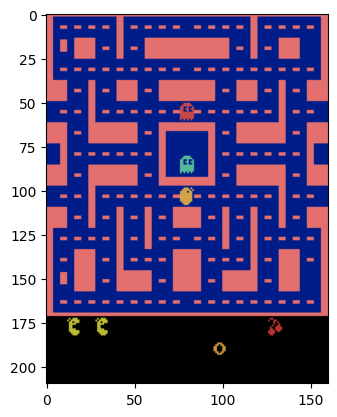

In [6]:
import ale_py
import gymnasium as gym
import matplotlib.pyplot as plt

env_name = "ALE/MsPacman-v5" #選擇遊戲種類
env = gym.make(env_name) #創建環境
env = env.unwrapped #減少限制，可以直接訪問底層束性或方法（例如動作含義）

#顯示環境訊息
print("environment:", env_name)
print("action space:", env.action_space.n)
print("action:", env.unwrapped.get_action_meanings())
print("observation space:", env.observation_space.shape) #(height, width, color tunnel(RGB=3))

#初始化
state = env.reset() #開始新一局遊戲
action = env.action_space.sample() #隨機採取一個動作，作為測試
obs, reward, terminated, truncated, info = env.step(action)
# obs(環境圖像), reward（當前獎勵值，吃到食物點的分數）,
#terminated（遊戲是否結束，True=結束）, truncated（是否被截斷） info（額外訊息，例如分數或生命）
plt.figure()
plt.imshow(obs)

### 2.2 Environment wrapper.

In [7]:
import numpy as np
from PIL import Image

class PacmanEnvWrapper(gym.Wrapper): #圖像預處理
# k 幀：“按下動作前” 的 歷史畫面訊息，幫助了解動態資訊
    def __init__(self, env, k, img_size=(84,84)): #k幀
        gym.Wrapper.__init__(self, env)
        self.k = k
        self.img_size = img_size
        obs_shape = env.observation_space.shape
        self.observation_space = gym.spaces.Box(low=0.0, high=1.0, shape=(k, img_size[0], img_size[1]), dtype=np.float32)

    def _preprocess(self, state, th=0.4):
        # TODO(Lab-1): Image processing.
        state = np.array(Image.fromarray(state).resize(self.img_size,Image.BILINEAR))
        # state (height, width, color)

        state = state.astype(np.float32).mean(2) / 255.
        #mean(2) 第三象限（顏色）ＲＧＢ三色取平均，轉換成一個灰色數值（單一值，明暗）
        #像素歸一到[0, 1]

        #二值化，增強圖像對比
        state[state > th] = 1.0
        state[state <= th] = 0.0

        return state

    def reset(self):
      state = self.env.reset() #回到遊戲初始狀態

      # 確認是否返回了tuple（可能包含其他訊息，(state, info)），並提取圖像
      if isinstance(state, tuple):
          state = state[0]

      state = self._preprocess(state)
      state = state[np.newaxis, ...].repeat(self.k, axis=0)  # 堆疊多幀
      # np.newaxis：增加一維度，(高度, 宽度) 变成 (1, 高度, 宽度)，這裡新維度，表示第幾幀
      # 疊k幀
      return state


    def step(self, action):
      state_next = []
      info = []
      reward = 0
      terminated = False
      truncated = False
      for i in range(self.k):
          if not terminated and not truncated:
              state_next_f, reward_f, terminated_f, truncated_f, info_f = self.env.step(action)
              state_next_f = self._preprocess(state_next_f)
              reward += reward_f
              terminated = terminated_f
              truncated = truncated_f
              info.append(info_f)
          state_next.append(state_next_f[np.newaxis, ...]) #change to (k, height, width)
      state_next = np.concatenate(state_next, 0) # 以[0]為軸串接
      return state_next, reward, terminated, truncated, info


In [ ]:
 # import numpy as np
# from PIL import Image
# import gym
# import cv2

# class PacmanEnvWrapper(gym.Wrapper):
#     def __init__(self, env, k, img_size=(84, 84)):
#         super().__init__(env)
#         self.k = k
#         self.img_size = img_size
#         self.pacman_color = (255, 255, 0)  # 假設 Pac-Man 是黃色
#         self.ghost_colors = [(255, 0, 0), (0, 0, 255)]  # 假設鬼為紅色和藍色
#         self.observation_space = gym.spaces.Box(
#             low=0.0, high=1.0, shape=(k, img_size[0], img_size[1]), dtype=np.float32
#         )

#     def _preprocess(self, state, threshold=0.4):
#         # 圖像縮放、灰階處理與二值化
#         state = np.array(Image.fromarray(state).resize(self.img_size, Image.BILINEAR))
#         state = state.astype(np.float32).mean(2) / 255.0  # 灰階化
#         state = np.where(state > threshold, 1.0, 0.0)  # 二值化

#         # 加入物件標記
#         state = self._highlight_objects(state)
#         return state

#     def _highlight_objects(self, state):
#         pacman_position = self._find_pacman(state)
#         ghost_positions = self._find_ghosts(state)

#         # 標記 Pac-Man 位置
#         if pacman_position:
#             state[pacman_position[1], pacman_position[0]] = 1.0  # Pac-Man 設為亮白色

#         # 標記鬼的位置
#         for pos in ghost_positions:
#             state[pos[1], pos[0]] = 0.5  # 鬼設為灰色
#         return state

#     def _find_pacman(self, state):
#         mask = self._color_mask(state, self.pacman_color)
#         pacman_position = self._find_largest_contour_center(mask)
#         return pacman_position

#     def _find_ghosts(self, state):
#         ghost_positions = []
#         for color in self.ghost_colors:
#             mask = self._color_mask(state, color)
#             ghost_position = self._find_largest_contour_center(mask)
#             if ghost_position:
#                 ghost_positions.append(ghost_position)
#         return ghost_positions

#     def _color_mask(self, state, color):
#         """創建指定顏色範圍的遮罩，用於偵測指定顏色的物體。"""
#         lower_bound = np.clip([color[0] - 10, color[1] - 10, color[2] - 10], 0, 255).astype(np.uint8)
#         upper_bound = np.clip([color[0] + 10, color[1] + 10, color[2] + 10], 0, 255).astype(np.uint8)

#         # 確保 state 為 uint8 格式
#         state_uint8 = (state * 255).astype(np.uint8)

#         # 使用 OpenCV 進行顏色篩選
#         img_cv = cv2.cvtColor(state_uint8, cv2.COLOR_RGB2BGR)
#         mask = cv2.inRange(img_cv, lower_bound, upper_bound)
#         return mask

#     def _find_largest_contour_center(self, mask):
#         """找到遮罩中最大的輪廓並返回其中心點。"""
#         contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
#         if contours:
#             largest_contour = max(contours, key=cv2.contourArea)
#             M = cv2.moments(largest_contour)
#             if M["m00"] != 0:
#                 center_x = int(M["m10"] / M["m00"])
#                 center_y = int(M["m01"] / M["m00"])
#                 return (center_x, center_y)
#         return None

#     def reset(self):
#         # 獲取初始狀態並進行處理
#         state = self.env.reset()
#         state = state[0] if isinstance(state, tuple) else state  # 提取圖像
#         processed_state = self._preprocess(state)

#         # 初始化多幀堆疊
#         stacked_state = np.repeat(processed_state[np.newaxis, ...], self.k, axis=0)
#         return stacked_state

#     def step(self, action):
#         stacked_frames, total_reward = [], 0
#         terminated, truncated = False, False
#         info = []

#         for _ in range(self.k):
#             if not terminated and not truncated:
#                 next_state, reward, terminated, truncated, info_f = self.env.step(action)
#                 processed_state = self._preprocess(next_state)
#                 total_reward += reward
#                 info.append(info_f)
#             stacked_frames.append(processed_state[np.newaxis, ...])

#         stacked_frames = np.concatenate(stacked_frames, axis=0)
#         return stacked_frames, total_reward, terminated, truncated, info


observation space: (4, 84, 84)
[[[1. 0. 0. ... 0. 0. 1.]
  [1. 1. 0. ... 0. 1. 1.]
  [1. 1. 0. ... 0. 1. 1.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[1. 0. 0. ... 0. 0. 1.]
  [1. 1. 0. ... 0. 1. 1.]
  [1. 1. 0. ... 0. 1. 1.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[1. 0. 0. ... 0. 0. 1.]
  [1. 1. 0. ... 0. 1. 1.]
  [1. 1. 0. ... 0. 1. 1.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[1. 0. 0. ... 0. 0. 1.]
  [1. 1. 0. ... 0. 1. 1.]
  [1. 1. 0. ... 0. 1. 1.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]]


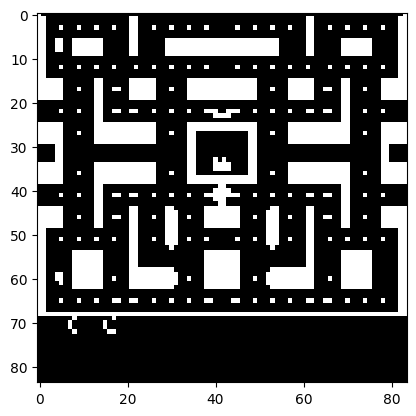

In [8]:
# Test Code
env_pacman = PacmanEnvWrapper(env, k=4, img_size=(84,84))
print("observation space:", env_pacman.observation_space.shape)

state = env_pacman.reset()
action = env_pacman.action_space.sample()
obs, reward, terminated, truncated, info = env_pacman.step(action)
print(obs)
plt.imshow(obs[0], cmap="gray")

## 3. Reinforcement Learning
### 3.1 Convolutional Neural Network

In [9]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

class QNet(nn.Module):
    # TODO(Lab-4): Q-Network architecture.
    def __init__(self, input_shape, n_actions):
        super(QNet, self).__init__()
        self.conv = nn.Sequential( #提取特徵
            nn.Conv2d(input_shape[0], 32, kernel_size=8, stride=4),
            #byTorch: state(color channel(RGB,3), height, width)
            #kernel size->filter size(8*8)
            # 輸出 32個特徵
            nn.ReLU(), #激活，有輸出就會激活
            nn.Conv2d(32, 64, kernel_size=4, stride=2),
            nn.ReLU(),
            nn.Conv2d(64, 64, kernel_size=3, stride=1),
            nn.ReLU(),
        )

        conv_out_size = self._get_conv_out(input_shape) #特徵圖總大小

        self.fc = nn.Sequential( #給Q值
            nn.Flatten(), #一維（x,y,z）~ x*y*z
            nn.Linear(conv_out_size, 512), # 從全部特徵中選512（hidden layer 大小
            nn.ReLU(),
            nn.Linear(512, n_actions), #提取512個特徵 並輸入可能的action(x) 每個值都對應自己的W(512*x)，去計算Q
        )

    def _get_conv_out(self, shape):
        o = self.conv(torch.zeros(1, *shape))
        return int(np.prod(o.size()))

    def forward(self, x):
        conv_out = self.conv(x) #擷取特徵
        out = self.fc(conv_out) #得到Ｑ值
        return out

### 3.2 DQN Algorithm

In [ ]:
class DeepQNetwork():
    def __init__(
        self,
        n_actions,
        input_shape,
        qnet,
        device,
        learning_rate=2e-4,
        reward_decay=0.99,
        replace_target_iter=1000,
        memory_size=10000,
        batch_size=32,
    ):
        # initialize parameters
        self.n_actions = n_actions #動作數量
        self.input_shape = input_shape #環境形狀(channel, height, width)
        self.lr = learning_rate
        self.gamma = reward_decay #折扣因子（對未來獎勵的重要性）
        self.replace_target_iter = replace_target_iter
        self.memory_size = memory_size
        self.batch_size = batch_size #每次訓練使用的樣本數
        self.device = device
        self.learn_step_counter = 0
        self.init_memory()

        # Network
        self.qnet_eval = qnet(self.input_shape, self.n_actions).to(self.device) #计算当前策略下的 Q 值
        self.qnet_target = qnet(self.input_shape, self.n_actions).to(self.device) #用于训练评估网络
        self.qnet_target.eval()
        self.optimizer = optim.RMSprop(self.qnet_eval.parameters(), lr=self.lr)

    def choose_action(self, state, epsilon=0):
        # 將狀態轉換為 FloatTensor 並增加 batch 維度
        state = torch.FloatTensor(state).unsqueeze(0).to(self.device)
        actions_value = self.qnet_eval.forward(state)
        if np.random.uniform() > epsilon:  # greedy
            action = torch.max(actions_value, 1)[1].data.cpu().numpy()[0]
        else:  # random
            action = np.random.randint(0, self.n_actions)
        return action

    def learn(self):
        # 替换目标网络参数
        if self.learn_step_counter % self.replace_target_iter == 0: #如果到達指定步數，將當前的參數記錄到Target當中
            self.qnet_target.load_state_dict(self.qnet_eval.state_dict())

        # 随机采样经验池中的一个批次
        if self.memory_counter > self.memory_size:
            sample_index = np.random.choice(self.memory_size, size=self.batch_size) #從固定大小的經驗池中隨機選擇
        else:
            sample_index = np.random.choice(self.memory_counter, size=self.batch_size) #從實際經驗數量選擇

        #遇到之前的某些状态相似的情况。在这种情况下，它可以使用之前的经验来推测在当前相似状态下应该采取的行动
        b_s = torch.FloatTensor(self.memory["s"][sample_index]).to(self.device) #state
        b_a = torch.LongTensor(self.memory["a"][sample_index]).to(self.device) #action
        b_r = torch.FloatTensor(self.memory["r"][sample_index]).to(self.device) #reward
        b_s_ = torch.FloatTensor(self.memory["s_"][sample_index]).to(self.device) #next state
        b_d = torch.FloatTensor(self.memory["done"][sample_index]).to(self.device) #done

        # DQN 和 DDQN 两种方式
        q_curr_eval = self.qnet_eval(b_s).gather(1, b_a) #forward(b_s), 得到所有行為Q值，並找出對應b_a的Ｑ
        q_next_target = self.qnet_target(b_s_).detach()
        q_next_eval = self.qnet_eval(b_s_).detach()
        next_state_values = q_next_target.gather(1, q_next_eval.max(1)[1].unsqueeze(1))  # DDQN（未來狀態預測）
        q_curr_recur = b_r + (1 - b_d) * self.gamma * next_state_values

        # 损失计算
        self.loss = F.smooth_l1_loss(q_curr_eval, q_curr_recur)

        # 反向传播和优化
        self.optimizer.zero_grad()
        self.loss.backward()
        self.optimizer.step()
        self.learn_step_counter += 1

        return self.loss.detach().cpu().numpy()

    # def learn(self):
    #   # 1. 定期更新目標網絡參數
    #   if self.learn_step_counter % self.replace_target_iter == 0:
    #       self.qnet_target.load_state_dict(self.qnet_eval.state_dict())

    #   # 2. 優化樣本選取：引入 Prioritized Experience Replay (如果未實現 PER, 這裡仍然隨機取樣)
    #   if self.memory_counter > self.memory_size:
    #       sample_index = np.random.choice(self.memory_size, size=self.batch_size)
    #   else:
    #       sample_index = np.random.choice(self.memory_counter, size=self.batch_size)

    #   # 提前將樣本轉換到設備上，減少不必要的轉換
    #   b_s = torch.FloatTensor(self.memory["s"][sample_index]).to(self.device)
    #   b_a = torch.LongTensor(self.memory["a"][sample_index]).to(self.device)
    #   b_r = torch.FloatTensor(self.memory["r"][sample_index]).to(self.device)
    #   b_s_ = torch.FloatTensor(self.memory["s_"][sample_index]).to(self.device)
    #   b_d = torch.FloatTensor(self.memory["done"][sample_index]).to(self.device)

    #   # 3. 計算當前 Q 值（使用 eval 網絡）和目標 Q 值（使用 target 網絡）進行 DDQN 更新
    #   q_curr_eval = self.qnet_eval(b_s).gather(1, b_a)  # 當前 Q 網絡的預測 Q 值
    #   q_next_target = self.qnet_target(b_s_).detach()   # 目標 Q 網絡的 Q 值（不進行反向傳播）
    #   q_next_eval = self.qnet_eval(b_s_).detach()       # 用來選擇動作的 Q 網絡

    #   # Double Q-learning: 由 eval 網絡選擇下一步動作，由 target 網絡計算 Q 值
    #   next_state_values = q_next_target.gather(1, q_next_eval.max(1)[1].unsqueeze(1))

    #   # 計算目標 Q 值
    #   q_curr_recur = b_r + (1 - b_d) * self.gamma * next_state_values

    #   # 4. 使用 Huber Loss (Smooth L1 Loss) 計算損失
    #   self.loss = F.smooth_l1_loss(q_curr_eval, q_curr_recur)

    #   # 5. 反向傳播，並使用梯度裁剪防止梯度爆炸
    #   self.optimizer.zero_grad()
    #   self.loss.backward()

    #   # 梯度裁剪，防止梯度爆炸
    #   torch.nn.utils.clip_grad_norm_(self.qnet_eval.parameters(), max_norm=1.0)

    #   self.optimizer.step()
    #   self.learn_step_counter += 1

    #   # 6. 返回當前的損失值，用於監控學習進度
    #   return self.loss.detach().cpu().numpy()


    def init_memory(self):
        # 初始化经验池
        self.memory = {
            "s": np.zeros((self.memory_size, *self.input_shape)),
            "a": np.zeros((self.memory_size, 1)),
            "r": np.zeros((self.memory_size, 1)),
            "s_": np.zeros((self.memory_size, *self.input_shape)),
            "done": np.zeros((self.memory_size, 1)),
        }

    def store_transition(self, s, a, r, s_, d):
        if not hasattr(self, 'memory_counter'):
            self.memory_counter = 0
        index = self.memory_counter % self.memory_size
        self.memory["s"][index] = s
        self.memory["a"][index] = np.array(a).reshape(-1, 1)
        self.memory["r"][index] = np.array(r).reshape(-1, 1)
        self.memory["s_"][index] = s_
        self.memory["done"][index] = np.array(d).reshape(-1, 1)
        self.memory_counter += 1

    def save_load_model(self, op, path="save", fname="qnet.pt"):
        if not os.path.exists(path):
            os.makedirs(path)
        file_path = os.path.join(path, fname)

        if op == "save":
            # 保存模型狀態、優化器狀態、學習步驟和經驗池計數
            checkpoint = {
                'qnet_eval_state_dict': self.qnet_eval.state_dict(),
                'qnet_target_state_dict': self.qnet_target.state_dict(),
                'optimizer_state_dict': self.optimizer.state_dict(),
                'learn_step_counter': self.learn_step_counter,
                'memory_counter': self.memory_counter,
            }
            torch.save(checkpoint, file_path)
            print(f"Model saved successfully at {file_path}")

        elif op == "load":
            try:
                # 加載模型狀態、優化器狀態、學習步驟和經驗池計數
                checkpoint = torch.load(file_path, map_location=self.device)

                # 檢查是否包含所有必需的鍵
                required_keys = ['qnet_eval_state_dict', 'qnet_target_state_dict', 'optimizer_state_dict']
                missing_keys = [key for key in required_keys if key not in checkpoint]

                if missing_keys:
                    raise KeyError(f"Missing keys in checkpoint: {missing_keys}")

                # 加載各部分的狀態
                self.qnet_eval.load_state_dict(checkpoint['qnet_eval_state_dict'])
                self.qnet_target.load_state_dict(checkpoint['qnet_target_state_dict'])
                self.optimizer.load_state_dict(checkpoint['optimizer_state_dict'])

                # 選擇性地加載學習計數
                self.learn_step_counter = checkpoint.get('learn_step_counter', 0)
                self.memory_counter = checkpoint.get('memory_counter', 0)

                print("Model loaded successfully from", file_path)

            except FileNotFoundError:
                print(f"No saved model found at {file_path}, starting fresh.")
            except KeyError as e:
                print(f"Error loading model: {e}")
    # def save_load_model(self, op, path="save", fname="qnet.pt"):
    #     import os
    #     if not os.path.exists(path):
    #         os.makedirs(path)
    #     file_path = os.path.join(path, fname)

    #     if op == "save":
    #         # 保存模型狀態、優化器狀態、學習步驟和經驗池計數
    #         checkpoint = {
    #             'qnet_eval_state_dict': self.qnet_eval.state_dict(),
    #             'qnet_target_state_dict': self.qnet_target.state_dict(),
    #             'optimizer_state_dict': self.optimizer.state_dict(),
    #             'learn_step_counter': self.learn_step_counter,
    #             'memory_counter': self.memory_counter,
    #         }
    #         torch.save(checkpoint, file_path)

    #     elif op == "load":
    #         # 加載模型狀態、優化器狀態、學習步驟和經驗池計數
    #         checkpoint = torch.load(file_path, map_location=self.device)
    #         self.qnet_eval.load_state_dict(checkpoint['qnet_eval_state_dict'])
    #         self.qnet_target.load_state_dict(checkpoint['qnet_target_state_dict'])
    #         self.optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
    #         self.learn_step_counter = checkpoint.get('learn_step_counter', 0)
    #         self.memory_counter = checkpoint.get('memory_counter', 0)


In [ ]:
stack_frames = 4
img_size = (84,84)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

agent = DeepQNetwork(
        n_actions = env.action_space.n,
        input_shape = [stack_frames, *img_size],
        qnet = QNet,
        device = device,
        learning_rate = 2e-4,
        reward_decay = 0.99,
        replace_target_iter = 1000,
        memory_size = 10000,
        batch_size = 32,)

print(agent.qnet_eval)

NameError: name 'DeepQNetwork' is not defined

In [10]:
stack_frames = 4
img_size = (84,84)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

Reference of Prioritized DQN:
- tutor:
https://cloud.tencent.com/developer/article/1635780
- code:
https://github.com/MorvanZhou/Reinforcement-learning-with-tensorflow/blob/master/contents/5.2_Prioritized_Replay_DQN/RL_brain.py#L18-L86

In [11]:
#SumTree Structure
class SumTree:
    def __init__(self, capacity):
        self.capacity = capacity
        self.tree = np.zeros(2 * capacity - 1)  # 樹中的節點數 = 2 * capacity - 1
        self.data = np.zeros(capacity, dtype=object)  # 儲存實際數據
        self.data_pointer = 0

    def add(self, priority, data):
        tree_index = self.data_pointer + self.capacity - 1  # 找到葉子節點的位置
        self.data[self.data_pointer] = data  # 儲存數據
        self.update(tree_index, priority)  # 更新優先級
        self.data_pointer = (self.data_pointer + 1) % self.capacity  # 更新位置

    def update(self, tree_index, priority):
        change = priority - self.tree[tree_index]
        self.tree[tree_index] = priority
        # Propagate the change up the tree
        while tree_index != 0:
            tree_index = (tree_index - 1) // 2
            self.tree[tree_index] += change

    def get_leaf(self, v):
        parent_index = 0
        while True:  # 從根節點開始往下搜索
            left_child = 2 * parent_index + 1
            right_child = left_child + 1
            if left_child >= len(self.tree):  # 已到達葉子節點
                leaf_index = parent_index
                break
            else:
                if v <= self.tree[left_child]:
                    parent_index = left_child
                else:
                    v -= self.tree[left_child]
                    parent_index = right_child
        data_index = leaf_index - self.capacity + 1
        return leaf_index, self.tree[leaf_index], self.data[data_index]

    def total_priority(self):
        return self.tree[0]

In [12]:
class PrioritizedReplayBuffer:
    def __init__(self, capacity, alpha=0.6):
        self.capacity = capacity
        self.alpha = alpha
        self.buffer = np.zeros((capacity, 5), dtype=object)  # 儲存經驗元組
        self.sum_tree = SumTree(capacity)  # 優先級 SumTree
        self.position = 0

    def add(self, state, action, reward, next_state, done):
        max_priority = self.sum_tree.tree[-self.sum_tree.capacity:].max() if self.position > 0 else 1.0
        experience = (np.array(state), action, reward, np.array(next_state), done)
        self.sum_tree.add(max_priority, experience)  # 加入 SumTree 中
        self.position = (self.position + 1) % self.capacity

    def sample(self, batch_size, beta=0.4, device="cpu"):
        batch = []
        indices = []
        priorities = []
        segment = self.sum_tree.total_priority() / batch_size

        for i in range(batch_size):
            v = np.random.uniform(i * segment, (i + 1) * segment)
            index, priority, data = self.sum_tree.get_leaf(v)
            batch.append(data)
            indices.append(index)
            priorities.append(priority)

        sampling_probabilities = np.array(priorities) / self.sum_tree.total_priority()
        weights = (len(self.buffer) * sampling_probabilities) ** (-beta)
        weights /= weights.max()
        weights = torch.tensor(weights, dtype=torch.float32).to(device)

        # 數據分拆
        with torch.no_grad():
            batch = list(zip(*batch))
            states = torch.FloatTensor(batch[0]).to(device)
            actions = torch.LongTensor(batch[1]).to(device)
            rewards = torch.FloatTensor(batch[2]).to(device)
            next_states = torch.FloatTensor(batch[3]).to(device)
            dones = torch.FloatTensor(batch[4]).to(device)

        return states, actions, rewards, next_states, dones, indices, weights

    def update_priorities(self, indices, td_errors):
        for idx, td_error in zip(indices, td_errors):
            priority = abs(td_error) ** self.alpha
            self.sum_tree.update(idx, priority + 1e-5)  # 避免優先級為零

In [13]:
class DeepQNetwork_Prioritize():
    def __init__(
        self,
        n_actions,
        input_shape,
        qnet,
        device,
        learning_rate=2e-4,
        reward_decay=0.99,
        replace_target_iter=1000,
        memory_size=5000,
        batch_size=32,
        initial_beta=0.4,
        final_beta=1.0,
        beta_anneal_steps=100000
    ):
        # initialize parameters
        self.n_actions = n_actions #動作數量
        self.input_shape = input_shape #環境形狀(channel, height, width)
        self.lr = learning_rate
        self.gamma = reward_decay #折扣因子（對未來獎勵的重要性）
        self.replace_target_iter = replace_target_iter
        self.memory_size = memory_size
        self.batch_size = batch_size #每次訓練使用的樣本數
        self.device = device
        self.learn_step_counter = 0
        self.memory_counter = 0
        #self.init_memory()

        #prioritize
        self.memory = PrioritizedReplayBuffer(memory_size)

        # Beta initialization
        self.initial_beta = initial_beta
        self.final_beta = final_beta
        self.beta_anneal_steps = beta_anneal_steps
        self.steps = 0  # 用於計算訓練步數
        self.beta = self.initial_beta

        # Network
        self.qnet_eval = qnet(self.input_shape, self.n_actions).to(self.device) #计算当前策略下的 Q 值
        self.qnet_target = qnet(self.input_shape, self.n_actions).to(self.device) #用于训练评估网络
        self.qnet_target.eval()
        self.optimizer = optim.RMSprop(self.qnet_eval.parameters(), lr=self.lr)



    def choose_action(self, state, epsilon=0):
        # 將狀態轉換為 FloatTensor 並增加 batch 維度
        state = torch.FloatTensor(state).unsqueeze(0).to(self.device)
        actions_value = self.qnet_eval.forward(state)
        if np.random.uniform() > epsilon:  # greedy
            action = torch.max(actions_value, 1)[1].data.cpu().numpy()[0]
        else:  # random
            action = np.random.randint(0, self.n_actions)
        return action

    def learn(self):
        # 替换目标网络参数
        if self.learn_step_counter % self.replace_target_iter == 0: #如果到達指定步數，將當前的參數記錄到Target當中
            self.qnet_target.load_state_dict(self.qnet_eval.state_dict())

        # 更新 beta 值
        self.steps += 1
        if self.steps < self.beta_anneal_steps:
            self.beta = self.initial_beta + (self.final_beta - self.initial_beta) * min(self.steps / self.beta_anneal_steps, 1.0)
        else:
            self.beta = self.final_beta

        # Sample from Prioritized Replay Buffer
        states, actions, rewards, next_states, dones, indices, weights = self.memory.sample(self.batch_size, self.beta)
        states = states.to(self.device)
        actions = actions.to(self.device)
        rewards = rewards.to(self.device)
        next_states = next_states.to(self.device)
        dones = dones.to(self.device)
        weights = weights.to(self.device)

        # Compute current and target Q-values
        q_curr_eval = self.qnet_eval(states).gather(1, actions.unsqueeze(1)).squeeze(1)
        q_next = self.qnet_target(next_states).detach().max(1)[0]
        q_target = rewards + (1 - dones) * self.gamma * q_next

        # Calculate loss with importance-sampling weights
        self.loss = (weights * F.smooth_l1_loss(q_curr_eval, q_target, reduction='none')).mean()

        # 反向传播和优化
        self.optimizer.zero_grad()
        self.loss.backward()
        self.optimizer.step()

        # Update priorities in replay buffer
        td_errors = (q_target - q_curr_eval).abs().detach().cpu().numpy()
        self.memory.update_priorities(indices, td_errors)

        torch.cuda.empty_cache() #刪除未使用暫存

        self.learn_step_counter += 1

        return self.loss.detach().cpu().numpy()


    def store_transition(self, s, a, r, s_, d):
        self.memory.add(s, a, r, s_, d)


    def save_load_model(self, op, path="save", fname="qnet.pt"):
        if not os.path.exists(path):
            os.makedirs(path)
        file_path = os.path.join(path, fname)

        if op == "save":
            # 保存模型狀態、優化器狀態、學習步驟和經驗池計數
            checkpoint = {
                'qnet_eval_state_dict': self.qnet_eval.state_dict(),
                'qnet_target_state_dict': self.qnet_target.state_dict(),
                'optimizer_state_dict': self.optimizer.state_dict(),
                'learn_step_counter': self.learn_step_counter,
                'memory_counter': self.memory_counter,
            }
            torch.save(checkpoint, file_path)
            print(f"Model saved successfully at {file_path}")

        elif op == "load":
            try:
              checkpoint = torch.load(file_path, map_location=self.device)
              required_keys = ['qnet_eval_state_dict', 'qnet_target_state_dict', 'optimizer_state_dict']
              missing_keys = [key for key in required_keys if key not in checkpoint]
              if missing_keys:
                raise KeyError(f"Missing keys in checkpoint: {missing_keys}")

              self.qnet_eval.load_state_dict(checkpoint['qnet_eval_state_dict'])
              self.qnet_target.load_state_dict(checkpoint['qnet_target_state_dict'])
              self.optimizer.load_state_dict(checkpoint['optimizer_state_dict'])

          # 如果成功加載，返回包含學習計數的字典
              return {
                "learn_step_counter": checkpoint.get('learn_step_counter', 0),
                "memory_counter": checkpoint.get('memory_counter', 0)
              }
            except FileNotFoundError:
                print(f"No saved model found at {file_path}, starting fresh.")
            except KeyError as e:
                print(f"Error loading model: {e}")


In [14]:
agent = DeepQNetwork_Prioritize(
        n_actions = env.action_space.n,
        input_shape = [stack_frames, *img_size],
        qnet = QNet,
        device = device,
        learning_rate = 2e-4,
        reward_decay = 0.99,
        replace_target_iter = 1000,
        memory_size = 10000,
        batch_size = 32,)

print(agent.qnet_eval)

QNet(
  (conv): Sequential(
    (0): Conv2d(4, 32, kernel_size=(8, 8), stride=(4, 4))
    (1): ReLU()
    (2): Conv2d(32, 64, kernel_size=(4, 4), stride=(2, 2))
    (3): ReLU()
    (4): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1))
    (5): ReLU()
  )
  (fc): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=3136, out_features=512, bias=True)
    (2): ReLU()
    (3): Linear(in_features=512, out_features=9, bias=True)
  )
)


## 4. Training and testing process.
### 4.1 Play the game.

In [15]:
def play(env, agent, stack_frames, img_size):
    # Reset environment.
    state = env.reset()

    # 如果state是tuple，提取第一個元素作為圖像
    if isinstance(state, tuple):
        state = state[0]

    # state形狀應該是 (k, 84, 84)，所以不再提取單幀
    # 確保數據類型為uint8，並去除不必要的維度
    state = (state * 255).astype(np.uint8)

    # 初始化圖像緩衝區
    img_buffer = [Image.fromarray(state[0])]  # 顯示第一幀

    # Initialize information.
    step = 0
    total_reward = 0

    # One episode.
    while True:
        # Select action.
        action = agent.choose_action(state, 0)

        # Get next stacked state.
        state_next, reward, terminated, truncated, info = env.step(action)

        # 如果 state_next 是 tuple，提取圖像
        if isinstance(state_next, tuple):
            state_next = state_next[0]

        # 不再提取單幀，直接使用多幀數據
        state_next = (state_next * 255).astype(np.uint8)

        # 每兩步存儲一幀圖像
        if step % 2 == 0:
            img_buffer.append(Image.fromarray(state_next[0]))  # 顯示第一幀

        state = state_next.copy()  # 更新狀態
        step += 1
        total_reward += reward
        print('\rStep: {:3d} | Reward: {:.3f} / {:.3f}'\
            .format(step, reward, total_reward), end="")

        # 檢查遊戲是否結束或步數超過2000
        if terminated or truncated or step > 2000:
            print()
            break

    return img_buffer


In [16]:
import os
project_root = os.getcwd()
def save_gif(img_buffer, fname, gif_path=os.path.join(project_root, "gif")):
    if not os.path.exists(gif_path):
        os.makedirs(gif_path)
    img_buffer[0].save(os.path.join(gif_path, fname), save_all=True, append_images=img_buffer[1:], duration=1, loop=0)

In [17]:
# Test Code
img_buffer = play(env_pacman, agent, stack_frames, img_size)
save_gif(img_buffer, fname="test.gif")

Step: 109 | Reward: 0.000 / 110.000


### 4.2 Epsilon greedy computation.

In [18]:
def epsilon_compute(frame_id, epsilon_max=1, epsilon_min=0.05, epsilon_decay=100000):
    return epsilon_min + (epsilon_max - epsilon_min) * np.exp(-frame_id / epsilon_decay)

# frame_id: 当前的帧数或步数
# epsilon_max, epsilon_min: explore rate (random choose)
# epsilon_decay 探索綠消退參數

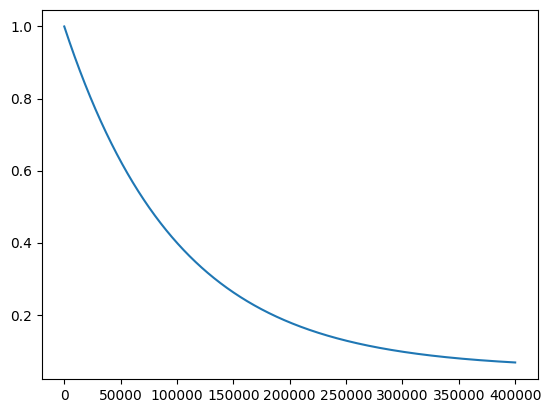

In [ ]:
# Test Code
frame_ids = np.array(range(400000))
epsilons = epsilon_compute(frame_ids)
plt.plot(epsilons)

### 4.3 Training steps.

In [19]:
def train(env, agent, stack_frames, img_size, save_path="save", max_steps=1000000):
    total_step = 0
    episode = 0

    # 嘗試加載模型和訓練狀態
    try:
        print("Loading model and training status...")
        status = agent.save_load_model(op="load", path=save_path, fname="qnet.pt")

        # Check if status is None before accessing its elements
        if status is not None:
            total_step = status["learn_step_counter"]
            episode = status["memory_counter"]
            print(f"Resuming training from total_step={total_step}, episode={episode}")
        else:
            print("Model loading failed or returned None. Starting training from scratch.")

    except FileNotFoundError:
        print("No previous model found. Starting training from scratch.")
    except KeyError as e:
        print(f"Missing key in checkpoint: {e}")


    device = next(agent.qnet_eval.parameters()).device


    while total_step <= max_steps:
        # Reset environment.
        state = env.reset()

        # 如果 state 是 tuple，提取圖像
        if isinstance(state, tuple):
            state = state[0]

        # Initialize information.
        step = 0
        total_reward = 0
        loss = 0

        # One episode.
        while True:
            # TODO(Lab-6): Select action.
            epsilon = epsilon_compute(total_step)
            action = agent.choose_action(state, epsilon)

            # Get next observation.
            obs, reward, terminated, truncated, info = env.step(action)

            # 如果 obs 是 tuple，提取圖像
            if isinstance(obs, tuple):
                obs = obs[0]

            # 判斷是否遊戲結束
            done = terminated or truncated

            # TODO(Lab-7): Train RL model.
            # Store transition and learn.
            agent.store_transition(state, action, reward, obs, done)
            if total_step > 4 * agent.batch_size:
                loss = agent.learn()

            state = obs.copy()  # 更新狀態
            step += 1
            total_step += 1
            total_reward += reward

            # 確保 loss 為浮點數以便於打印
            if total_step % 100 == 0 or done:
                print('\rEpisode: {:3d} | Step: {:3d} / {:3d} | Reward: {:.3f} / {:.3f} | Loss: {:.3f} | Epsilon: {:.3f}'\
                    .format(episode, step, total_step, reward, total_reward, loss, epsilon), end="")

            if total_step % 3000 == 0:
                print("\nSave Model ...")
                agent.save_load_model(
                    op="save",
                    path=save_path,
                    fname="qnet.pt"
                )
                print("Generate GIF ...")
                img_buffer = play(env, agent, stack_frames, img_size)
                save_gif(img_buffer, "train_" + str(total_step).zfill(6) + ".gif")
                print("Done !!")

            if done or step > 2000:
                episode += 1
                print()
                break

        if total_step > max_steps:
            break


In [20]:
train(env_pacman, agent, stack_frames, img_size, save_path=os.path.join(project_root, "save"), max_steps=400000)

Loading model and training status...
No saved model found at /content/save/qnet.pt, starting fresh.
Model loading failed or returned None. Starting training from scratch.


<ipython-input-13-e3c8ed25f01b>:126: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(file_path, map_location=self.device)


Episode:   0 | Step: 128 / 128 | Reward: 0.000 / 280.000 | Loss: 0.000 | Epsilon: 0.999


<ipython-input-12-079e0efb1eb3>:36: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:278.)
  states = torch.FloatTensor(batch[0]).to(device)


Episode:   1 | Step: 192 / 320 | Reward: 0.000 / 750.000 | Loss: 2.863 | Epsilon: 0.997
Episode:   2 | Step:  99 / 419 | Reward: 0.000 / 220.000 | Loss: 1.890 | Epsilon: 0.996
Episode:   3 | Step: 190 / 609 | Reward: 0.000 / 580.000 | Loss: 1.205 | Epsilon: 0.994
Episode:   4 | Step: 151 / 760 | Reward: 0.000 / 510.000 | Loss: 2.116 | Epsilon: 0.993
Episode:   5 | Step: 133 / 893 | Reward: 0.000 / 470.000 | Loss: 2.173 | Epsilon: 0.992
Episode:   6 | Step:  89 / 982 | Reward: 0.000 / 270.000 | Loss: 1.593 | Epsilon: 0.991
Episode:   7 | Step: 149 / 1131 | Reward: 0.000 / 1190.000 | Loss: 5.249 | Epsilon: 0.989
Episode:   8 | Step: 194 / 1325 | Reward: 0.000 / 2190.000 | Loss: 4.755 | Epsilon: 0.988
Episode:   9 | Step: 120 / 1445 | Reward: 0.000 / 310.000 | Loss: 5.721 | Epsilon: 0.986
Episode:  10 | Step: 166 / 1611 | Reward: 0.000 / 770.000 | Loss: 6.708 | Epsilon: 0.985
Episode:  11 | Step: 140 / 1751 | Reward: 0.000 / 600.000 | Loss: 2.612 | Epsilon: 0.984
Episode:  12 | Step: 116 

KeyboardInterrupt: 

### 4.4 Evaluate the trained model.

In [21]:
agent.save_load_model(op="load", path=os.path.join(project_root, "save"), fname="qnet.pt")
img_buffer = play(env_pacman, agent, stack_frames, img_size)
save_gif(img_buffer, "eval.gif")

<ipython-input-13-e3c8ed25f01b>:126: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(file_path, map_location=self.device)


Step: 124 | Reward: 0.000 / 520.000
